In [14]:
%matplotlib inline
import os, cv2, re, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
img_width = 150
img_height = 150
TRAIN_DIR = '/Users/hstrey/Downloads/dogs-vs-cats-redux-kernels-edition/train/'
TEST_DIR = '/Users/hstrey/Downloads/dogs-vs-cats-redux-kernels-edition/test/'
train_images_dogs_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
test_images_dogs_cats = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [9]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [10]:
train_images_dogs_cats.sort(key=natural_keys)
train_images_dogs_cats = train_images_dogs_cats[0:1300] + train_images_dogs_cats[12500:13800] 

test_images_dogs_cats.sort(key=natural_keys)

In [11]:
def prepare_data(list_of_images):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'dog' in i:
            y.append(1)
        elif 'cat' in i:
            y.append(0)
        #else:
            #print('neither cat nor dog name present in images')
            
    return x, y

In [12]:
X, Y = prepare_data(train_images_dogs_cats)
print(K.image_data_format())

channels_last


In [13]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=1)

shape:  (150, 150, 3)
y =  1


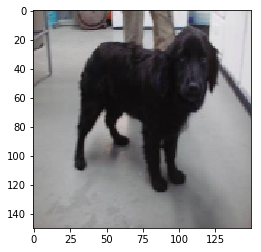

In [19]:
index = 5
sample_img = X_train[index]
print("shape: ",sample_img.shape)
print("y = ",Y_train[index])
# plot the image
plt.imshow(sample_img).set_cmap('Greys')